Task 1 - Load pandas, seaborn, numpy and pyplot module form matplotlib library

In [2]:
#Import libraries
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Task 2 - Import tips data from seaborn package

In [3]:
# Import data
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


Task 3 - Give a brief summary of the tips data (description, number of variables, size, types of variables)

In [4]:
# Write your code here. You can create additional code cells to display outputs
print('Data description')
tips.describe()

Data description


,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [5]:
print('\nNumber of variables')
tips.shape[1]


Number of variables


7

Task 4 - Create appropriate univariate plots for each variable using pyplot module and Interpret the results. Select appropriate summary statistic to describe the center and spread for each numerical variable and provide justification of the same.

<h3>Univariate plots</h3>

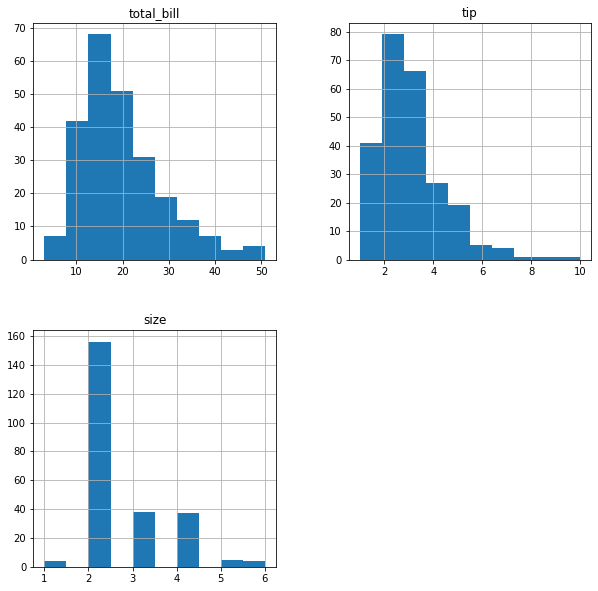

In [6]:
# Code for univariate plot - You can create multple code cells here
plt.rc('font', size = 10)
tips.hist(figsize=(10,10))
plt.show()

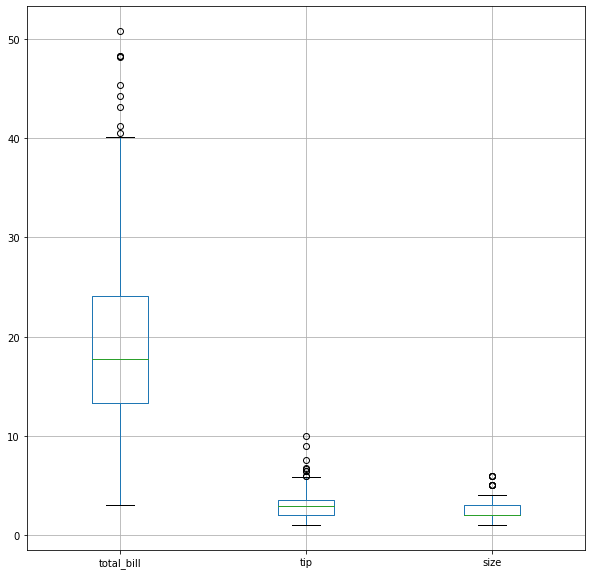

In [7]:
plt.rc('font', size = 10)
tips.boxplot(figsize=(10,10))
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='count'>

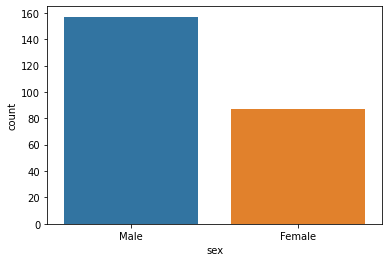

In [8]:
sns.countplot(tips['sex'], label = "Count")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='smoker', ylabel='count'>

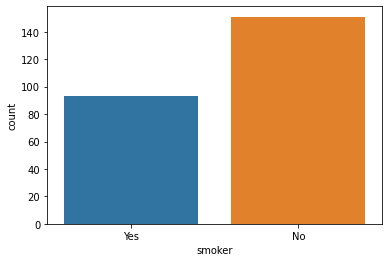

In [9]:
sns.countplot(tips['smoker'], label = "Count")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='day', ylabel='count'>

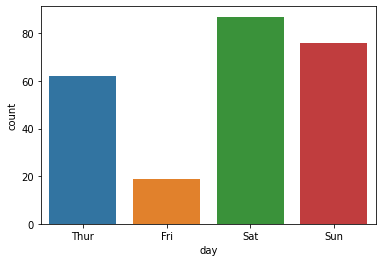

In [10]:
sns.countplot(tips['day'], label = "Count")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='time', ylabel='count'>

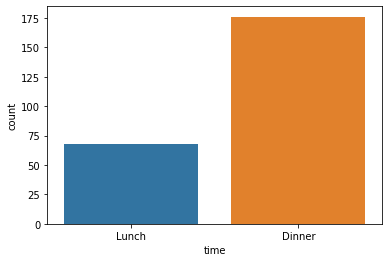

In [11]:
sns.countplot(tips['time'], label = "Count")

<h3>Measure of center</h3>

In [12]:
numAttr = ['total_bill', 'tip', 'size']
nTips = tips[numAttr]
print('Mean of numerical attributes')
nTips.mean()

Mean of numerical attributes


total_bill    19.785943
tip            2.998279
size           2.569672
dtype: float64

In [13]:
print('Median of numerical attributes')
nTips.median()

Median of numerical attributes


total_bill    17.795
tip            2.900
size           2.000
dtype: float64

<h3>Measure of spread</h3>

In [14]:
print('Range of numerical attributes')
for attr in nTips:
    print(attr + ": " + str(nTips[attr].max() - nTips[attr].min()))

Range of numerical attributes
total_bill: 47.74
tip: 9.0
size: 5


In [15]:
print('IQR of numerical attributes')
for attr in nTips:
    q75, q25 = np.percentile(nTips[attr], [75 ,25])
    iqr = q75 - q25
    print(attr + ": " + str(iqr))

IQR of numerical attributes
total_bill: 10.779999999999998
tip: 1.5624999999999996
size: 1.0


<p>From the histograms we can observe that non of the numerical attributes have a normal distribution, they are positively skewed. This is reinforced by looking at the mean and the median. In all 3 cases, the mean is higher than the median. <br>

If we obsevrve the box-whisker plots of the numerical attributes we can find that there are quite a few outliers for each attribute. That is, instances were the value is higher than Q3 + 1.5 * IQR. However, before dealing with these outliers some investigation is required to avoid marginalising a minority group.<br> 

By looking at the bar charts of the categorical data we can observe that the data isn't equally distributed amongst the possible values for each attribute. For example, there are less smokers than non-smokers. Or that people tend to visit this restaurant more for dinner probably because it's when they have more free time. The same occurs when looking at the days of the week. The restaurant has more customers that leave a tip on Saturday and Sunday. One thing that is surprising is that they have more clients on Thursday than Friday.
</p>

Task 5 - There are <sup/>7</sup>C<sub/>2</sub> possible bivariate plots possible for the given dataset. You need to create any 6 bivariate plots of your choice and interpret the results. 

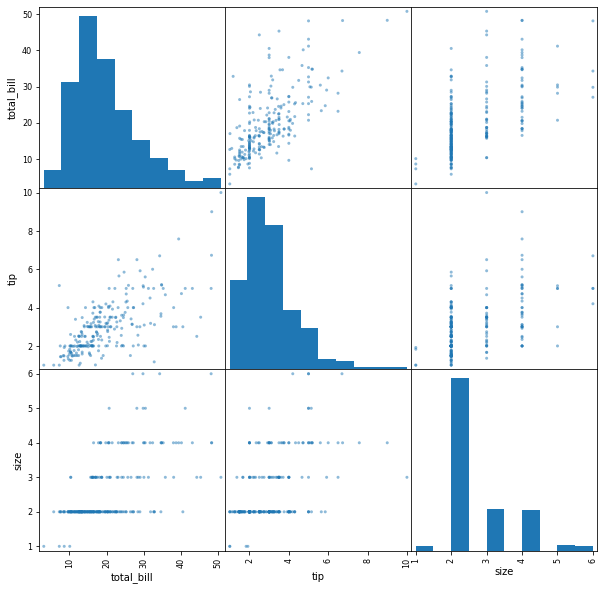

In [16]:
# Code for bivariate plot - You can create multple code cells here
pd.plotting.scatter_matrix(tips, figsize=(10,10))
plt.show()

<p>From these scatter plots we can see that there is a slight correlation between the total bill and the amount the customer tipped. This makes sense as most people have a rule of tipping between 10 and 20% of the total bill. However, we can see some cases where this does not occur.</p>

In [17]:
corr = tips.corr()
print(corr)

            total_bill       tip      size
total_bill    1.000000  0.675734  0.598315
tip           0.675734  1.000000  0.489299
size          0.598315  0.489299  1.000000


<p>This correlation table confirms that there is a slight relationship between the total bill to pay and the tip left by the customer. We can also see that there is a very slight correlation between the size of the table and the total bill. We can imagine that happening because it is likely that a table with more customers will order more items from the menu. Perhaps, if the dataset had more cases of larger groups, the correlation coefficient would be higher.</p>

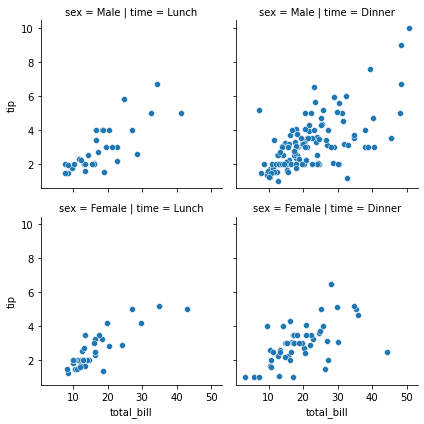

In [18]:
g = sns.FacetGrid(tips, col="time",  row="sex")
g.map(sns.scatterplot, "total_bill", "tip")

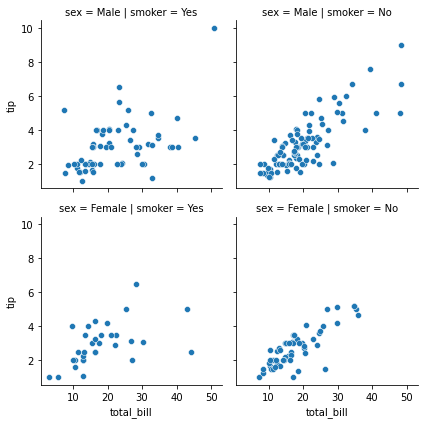

In [19]:
g = sns.FacetGrid(tips, col="smoker",  row="sex")
g.map(sns.scatterplot, "total_bill", "tip")

<p>For some reason, there seems to be a stronger relationship between the total bill and the size of the tipper when the customer is a non smoker than when they are smokers.</p>

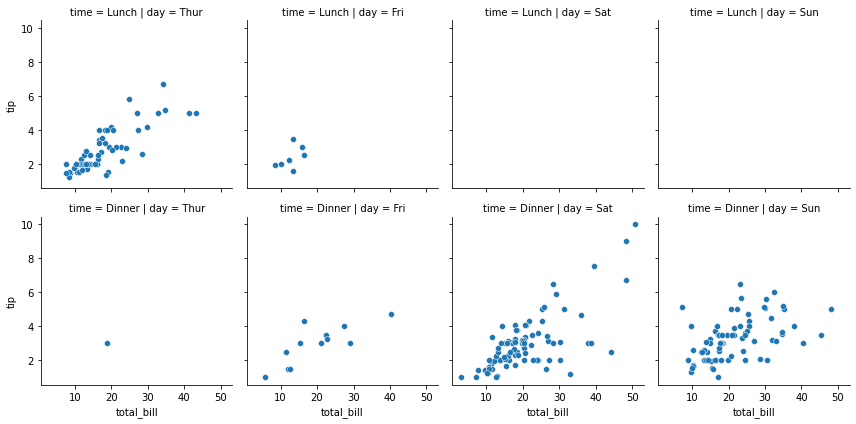

In [21]:
g = sns.FacetGrid(tips, col="day",  row="time")
g.map(sns.scatterplot, "total_bill", "tip")

<p>Here we can see that there were no customers for lunch the weekend. This could be because the restaurant is shut for lunch on these days. There also seems to be a weaker correlation between tips and the total bills on Sunday. </p>

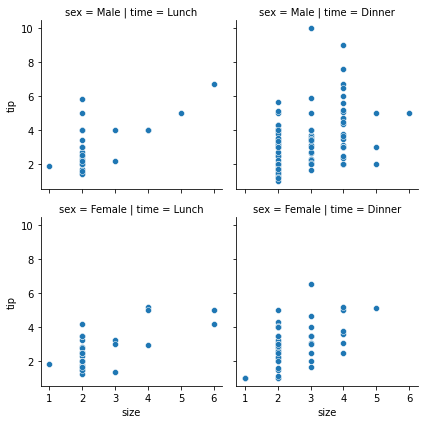

In [23]:
g = sns.FacetGrid(tips, col="time",  row="sex")
g.map(sns.scatterplot, "size", "tip")

<p>In this plot, we can identify that at lunch time there is big majority in customers in groups of two. It does still remain the table size with the most instances at dinner but there are more groups of 3 and 4. Perticularly, when a male is paying. This is assuming that the sex attriute of the dataset consists depends who pays for the table.</p>